In [10]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/99.8 MB 8.1 MB/s eta 0:00:13
   ---------------------------------------- 0.9/99.8 MB 10.0 MB/s eta 0:00:10
    --------------------------------------- 1.7/99.8 MB 12.4 MB/s eta 0:00:08
   - -------------------------------------- 2.5/99.8 MB 13.4 MB/s eta 0:00:08
   - -------------------------------------- 3.3/99.8 MB 13.9 MB/s eta 0:00:07
   - -------------------------------------- 4.6/99.8 MB 16.4 MB/s eta 0:00:06
   -- ------------------------------------- 6.1/99.8 MB 18.5 MB/s eta 0:00:06
   --- ------------------------------------ 7.7/99.8 MB 20.5 MB/s eta 0:00:05
   --- -----------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train and test datasets
train_df = pd.read_csv(r"D:/PYTHON/UIET__##PYTHON/ML_lab/regression_dataset/train.csv")
test_df = pd.read_csv(r"D:/PYTHON/UIET__##PYTHON/ML_lab/regression_dataset/test.csv")

# train head
print("Train Dataset:")
print(train_df.head())

# test head
print("\nTest Dataset:")
print(test_df.head())


Train Dataset:
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

Test Dataset:
   id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1


In [3]:
# Get the number of instances in the training dataset
train_instances = train_df.shape[0]

# Get the number of instances in the testing dataset
test_instances = test_df.shape[0]

print("Number of instances in the training dataset:", train_instances)
print("Number of instances in the testing dataset:", test_instances)


Number of instances in the training dataset: 913000
Number of instances in the testing dataset: 45000


In [4]:
# Convert 'date' column to same format (datetime format)
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Check for missing values
print("Missing values in train dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

# Ensure consistency in date formats between train and test datasets
#print("\nUnique date formats in train dataset:", train_df['date'].dt.strftime('%m/%d/%Y').nunique())
#print("Unique date formats in test dataset:", test_df['date'].dt.strftime('%m/%d/%Y').nunique())


Missing values in train dataset:
date     0
store    0
item     0
sales    0
dtype: int64

Missing values in test dataset:
id       0
date     0
store    0
item     0
dtype: int64


In [5]:
# Feature Engineering
# Extracting relevant features from the date column # Monday=0, Sunday=6
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['weekday'] = train_df['date'].dt.weekday

# Incorporating lag features to capture temporal patterns (Seasonal Patterns and for further analysis)
for i in range(1, 8):
    train_df[f'sales_lag_{i}'] = train_df.groupby(['store', 'item'])['sales'].shift(i)

print(train_df.head())


        date  store  item  sales  year  month  day  weekday  sales_lag_1  \
0 2013-01-01      1     1     13  2013      1    1        1          NaN   
1 2013-01-02      1     1     11  2013      1    2        2         13.0   
2 2013-01-03      1     1     14  2013      1    3        3         11.0   
3 2013-01-04      1     1     13  2013      1    4        4         14.0   
4 2013-01-05      1     1     10  2013      1    5        5         13.0   

   sales_lag_2  sales_lag_3  sales_lag_4  sales_lag_5  sales_lag_6  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2         13.0          NaN          NaN          NaN          NaN   
3         11.0         13.0          NaN          NaN          NaN   
4         14.0         11.0         13.0          NaN          NaN   

   sales_lag_7  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


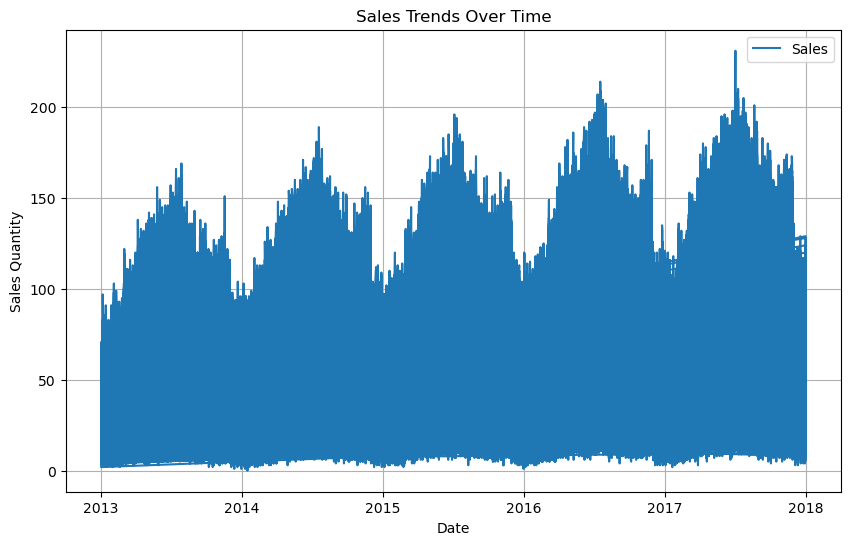

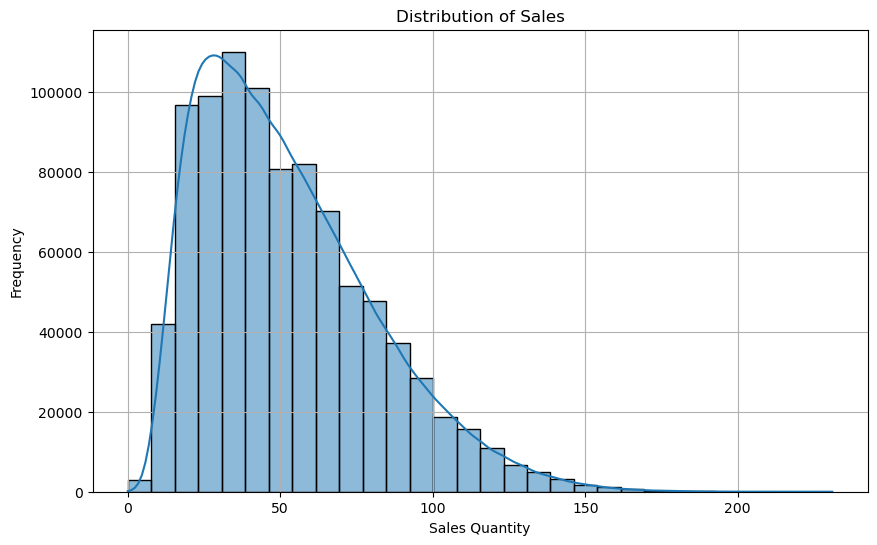

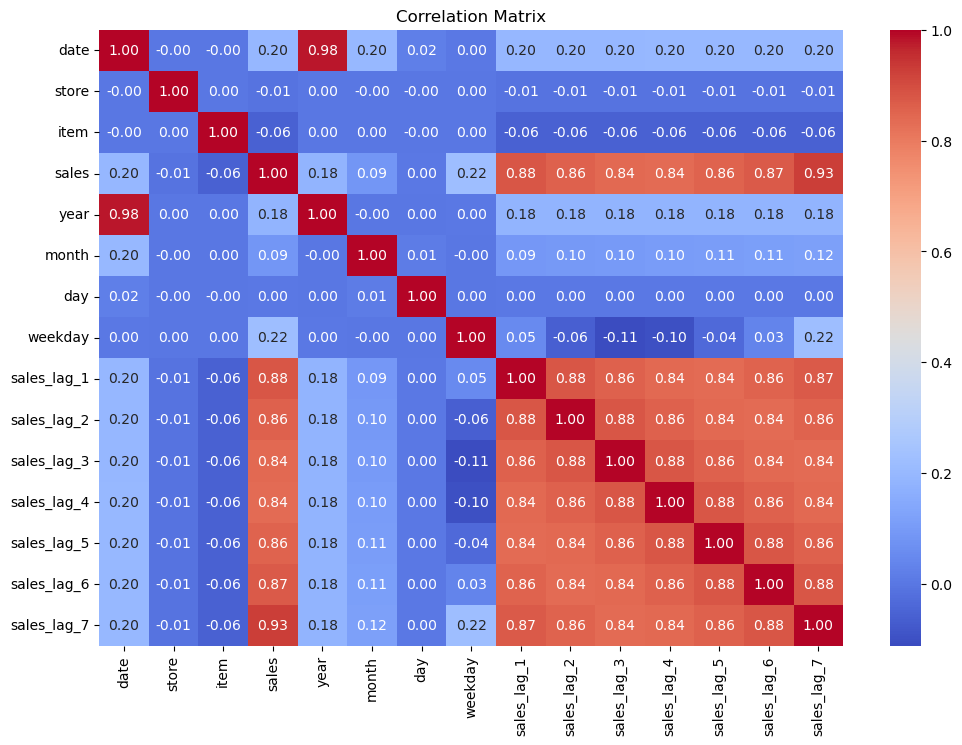

In [6]:
# Exploratory Data Analysis (EDA)
# Visualize sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(train_df['date'], train_df['sales'], label='Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Analyze the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(train_df['sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Explore correlations between features and the target variable
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [7]:
# Check for NaN values in the dataset
print("NaN values in train dataset:")
print(train_df.isnull().sum())

NaN values in train dataset:
date              0
store             0
item              0
sales             0
year              0
month             0
day               0
weekday           0
sales_lag_1     500
sales_lag_2    1000
sales_lag_3    1500
sales_lag_4    2000
sales_lag_5    2500
sales_lag_6    3000
sales_lag_7    3500
dtype: int64


In [8]:
#If Missing values are there then
# Handle missing values by filling NaN with 0
train_df.fillna(0, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Split the dataset into features (X) and target variable (y)
X = train_df.drop(['date', 'sales'], axis=1)
y = train_df['sales']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train multiple regression models (Later we will select the best based on MAE and will select that one for forecasting)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluate each model's performance using MAE on both training and validation sets
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_preds = model.predict(X_train_scaled)
    val_preds = model.predict(X_val_scaled)
    train_mae = mean_absolute_error(y_train, train_preds)
    val_mae = mean_absolute_error(y_val, val_preds)
    print(f"{name}:")
    print(f"  Training MAE: {train_mae:.2f}")
    print(f"  Validation MAE: {val_mae:.2f}")


Linear Regression:
  Training MAE: 6.70
  Validation MAE: 6.70
Random Forest:
  Training MAE: 2.30
  Validation MAE: 6.20
XGBoost:
  Training MAE: 5.92
  Validation MAE: 6.03


In [10]:
print(X.head())
print(y.head())

   store  item  year  month  day  weekday  sales_lag_1  sales_lag_2  \
0      1     1  2013      1    1        1          0.0          0.0   
1      1     1  2013      1    2        2         13.0          0.0   
2      1     1  2013      1    3        3         11.0         13.0   
3      1     1  2013      1    4        4         14.0         11.0   
4      1     1  2013      1    5        5         13.0         14.0   

   sales_lag_3  sales_lag_4  sales_lag_5  sales_lag_6  sales_lag_7  
0          0.0          0.0          0.0          0.0          0.0  
1          0.0          0.0          0.0          0.0          0.0  
2          0.0          0.0          0.0          0.0          0.0  
3         13.0          0.0          0.0          0.0          0.0  
4         11.0         13.0          0.0          0.0          0.0  
0    13
1    11
2    14
3    13
4    10
Name: sales, dtype: int64


In [11]:
#Hyperparameter tunning for XGBoost
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost regressor
xgb_reg = XGBRegressor(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=3, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model's performance on the validation set
val_preds = best_xgb_model.predict(X_val_scaled)
val_mae = mean_absolute_error(y_val, val_preds)
print("\nValidation MAE with Best XGBoost Model:", val_mae)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   2.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   2.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   2.2s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_es

In [12]:
# Extracting relevant features from the date column # Monday=0, Sunday=6
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['weekday'] = test_df['date'].dt.weekday

# Define features (X_test) for the test dataset
X_test = test_df.drop(['date', 'id'], axis=1)

print(X_test.head())
print(X_test.isnull().sum())
#X_test.fillna(0, inplace=True)


   store  item  year  month  day  weekday
0      1     1  2018      1    1        0
1      1     1  2018      1    2        1
2      1     1  2018      1    3        2
3      1     1  2018      1    4        3
4      1     1  2018      1    5        4
store      0
item       0
year       0
month      0
day        0
weekday    0
dtype: int64


In [13]:
 # Get the list of lag features present in the training dataset
lag_features_train = [col for col in X_train.columns if col.startswith('sales_lag_')]

 # Get the list of lag features present in the test dataset
lag_features_test = [col for col in X_test.columns if col.startswith('sales_lag_')]

 # Identify missing lag features in the test dataset
missing_lag_features = [col for col in lag_features_train if col not in lag_features_test]

 # Add missing lag features to the test dataset
for lag_feature in missing_lag_features:
     X_test[lag_feature] = 0  # or any appropriate default value

 # Scale the features of the test dataset
X_test_scaled = scaler.transform(X_test)

In [14]:
# Use the best XGBoost model to make predictions on the test set
test_preds = best_xgb_model.predict(X_test_scaled)


# Create a DataFrame to store the predictions
test_predictions_df = pd.DataFrame({'ID': X_test.index, 'sales': test_preds})

# Export the predictions DataFrame to a file
#test_predictions_df.to_csv('test_predictions.csv', index=False)


In [15]:
# Merge the predictions DataFrame with the original test dataset
test_predictions_with_info = pd.merge(test_predictions_df, test_df[['id', 'date', 'store', 'item']], left_on='ID', right_on='id', how='left')

# Drop the duplicate 'id' column
test_predictions_with_info.drop(columns=['id'], inplace=True)

# Define a mapping between product IDs and their names
product_names = {
    1: 'Apple',
    2: 'Banana',
    3: 'Orange',
    4: 'Milk',
    5: 'Bread',
    6: 'Eggs',
    7: 'Cheese',
    8: 'Butter',
    9: 'Yogurt',
    10: 'Chicken',
    11: 'Beef',
    12: 'Fish',
    13: 'Rice',
    14: 'Pasta',
    15: 'Tomato',
    16: 'Potato',
    17: 'Onion',
    18: 'Carrot',
    19: 'Lettuce',
    20: 'Cucumber',
    21: 'Bell Pepper',
    22: 'Broccoli',
    23: 'Spinach',
    24: 'Avocado',
    25: 'Strawberries',
    26: 'Blueberries',
    27: 'Grapes',
    28: 'Watermelon',
    29: 'Soap',
    30: 'Shampoo',
    31: 'Toothpaste',
    32: 'Deodorant',
    33: 'Towel',
    34: 'Toilet Paper',
    35: 'Laundry Detergent',
    36: 'Dish Soap',
    37: 'Trash Bags',
    38: 'Cereal',
    39: 'Coffee',
    40: 'Tea',
    41: 'Snacks',
    42: 'Chips',
    43: 'Cookies',
    44: 'Soda',
    45: 'Juice',
    46: 'Frozen Pizza',
    47: 'Ice Cream',
    48: 'Frozen Vegetables',
    49: 'Canned Soup',
    50: 'Peanut Butter'
}


# Map product IDs to their names in the DataFrame
test_predictions_with_info['product_name'] = test_predictions_with_info['item'].map(product_names)

# Round off the sales column
test_predictions_with_info['sales'] = test_predictions_with_info['sales'].round()

# Reorder the columns for better readability
test_predictions_with_info = test_predictions_with_info[['ID', 'date', 'store', 'item','product_name', 'sales']]

# Export the updated predictions DataFrame to a file for PowerBI
test_predictions_with_info.to_csv('test_predictions_with_info.csv', index=False)



# # Origainal one
# # Merge the predictions DataFrame with the original test dataset
# test_predictions_with_info = pd.merge(test_predictions_df, test_df[['id', 'date', 'store', 'item']], left_on='ID', right_on='id', how='left')

# # Drop the duplicate 'id' column
# test_predictions_with_info.drop(columns=['id'], inplace=True)

# # Reorder the columns for better readability
# test_predictions_with_info = test_predictions_with_info[['ID', 'date', 'store', 'item', 'sales']]

# # Export the updated predictions DataFrame to a file for PowerBI
# test_predictions_with_info.to_csv('test_predictions_with_info.csv', index=False)


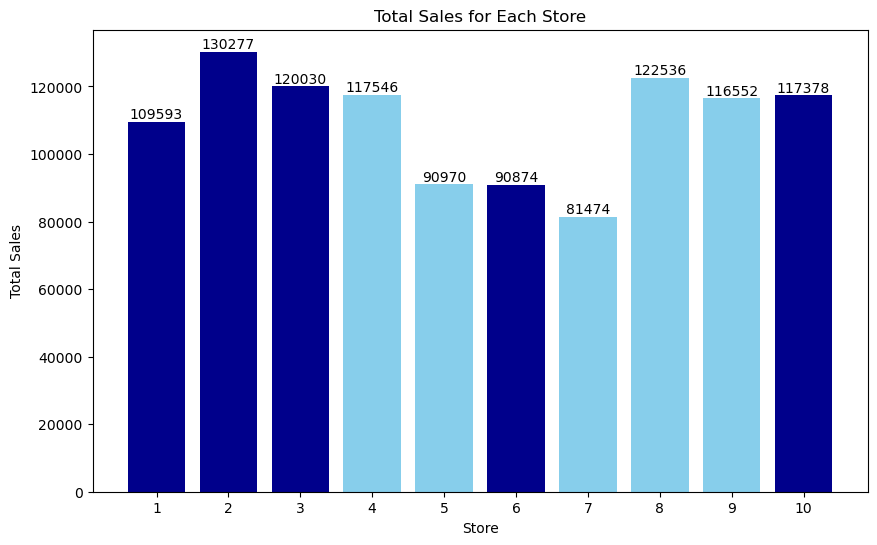

In [16]:
# Load the merged data
merged_data = pd.read_csv('test_predictions_with_info.csv')

# Group by 'store' and calculate total sales for each store
total_sales_per_store = merged_data.groupby('store')['sales'].sum().reset_index()

# Sort stores based on total sales in descending order
total_sales_per_store = total_sales_per_store.sort_values(by='sales', ascending=False)

#colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'cornflowerblue', 'lightseagreen', 'gold', 'orchid', 'lightsteelblue']
colors = ['darkblue', 'skyblue']


# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(total_sales_per_store['store'], total_sales_per_store['sales'], color= colors)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Store')
plt.xticks(total_sales_per_store['store'])

for bar in bars:
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.show()


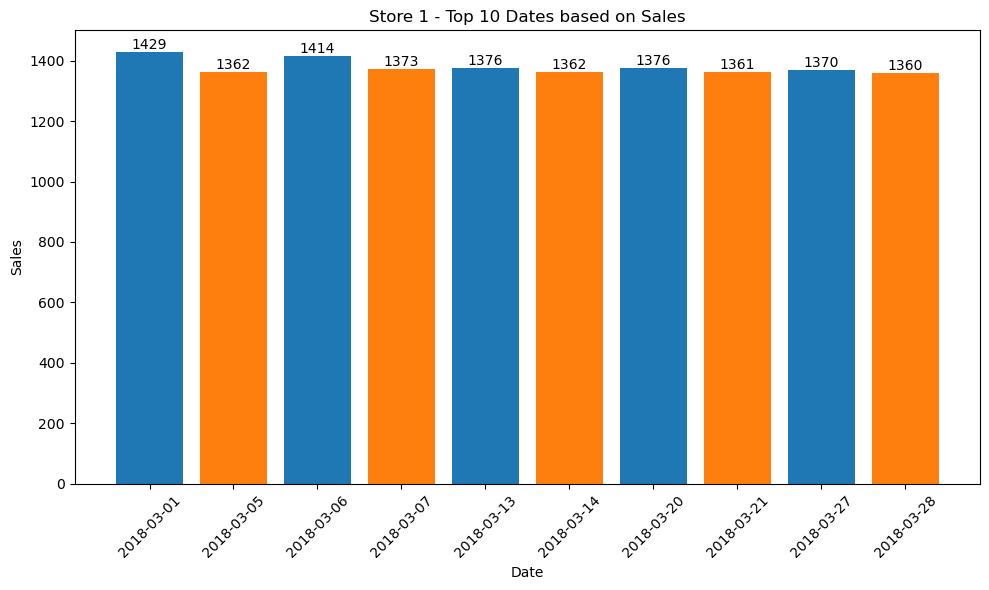

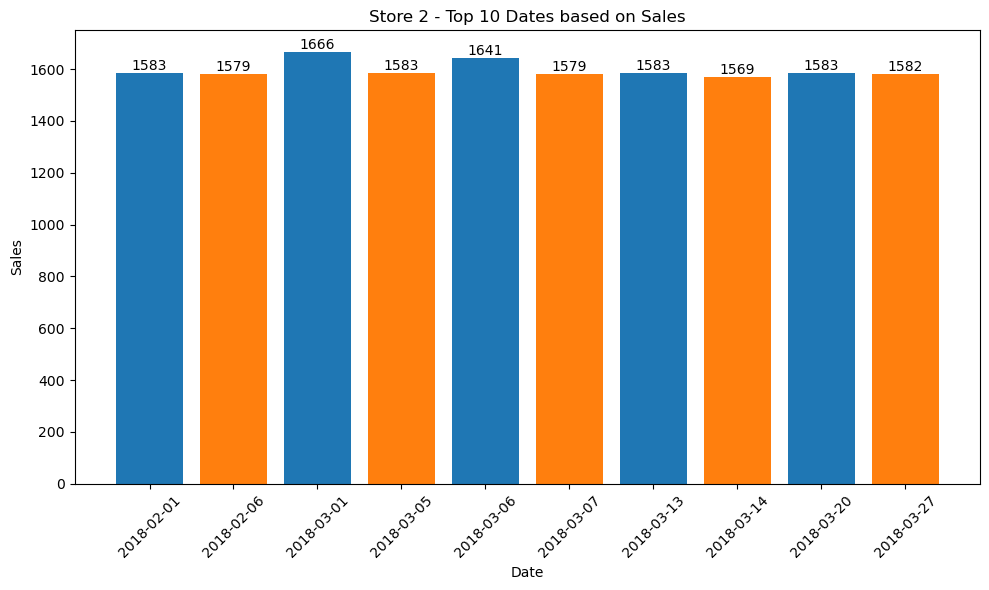

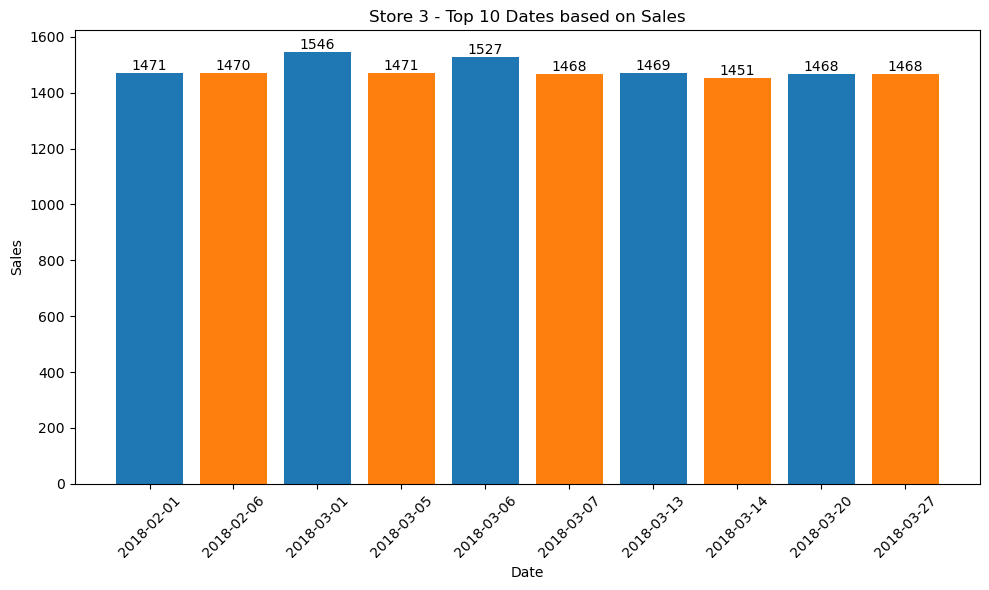

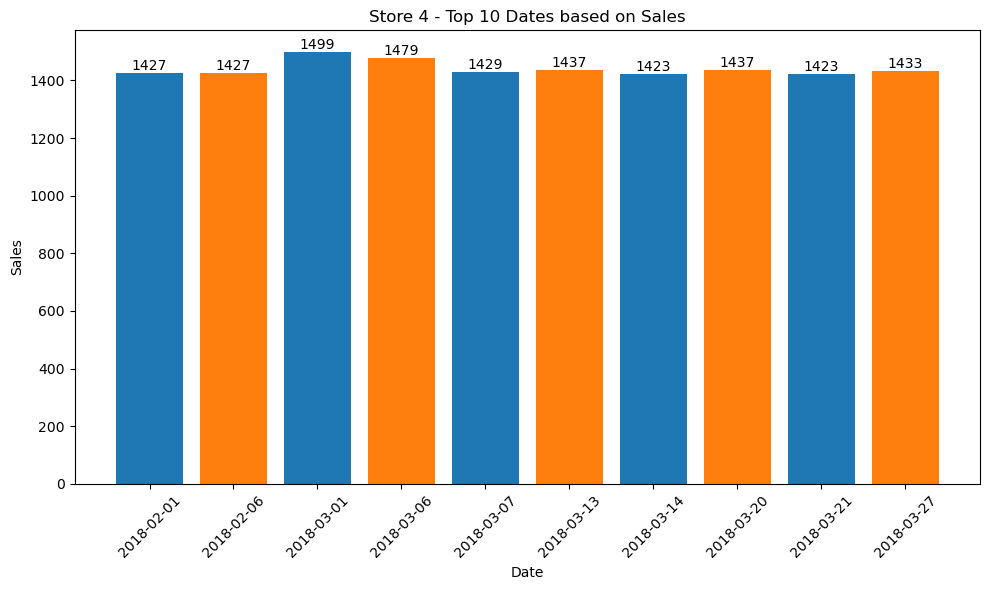

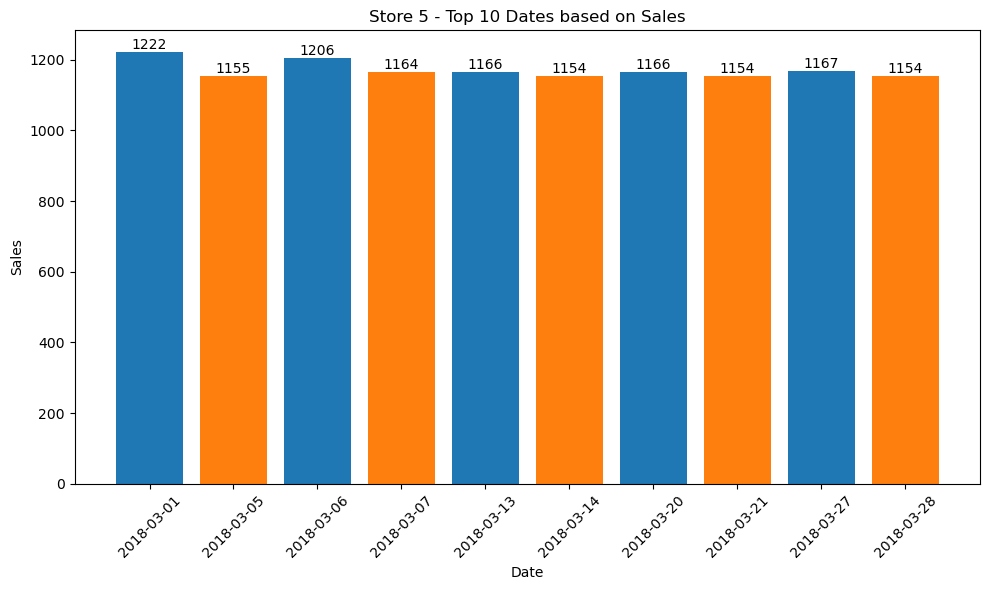

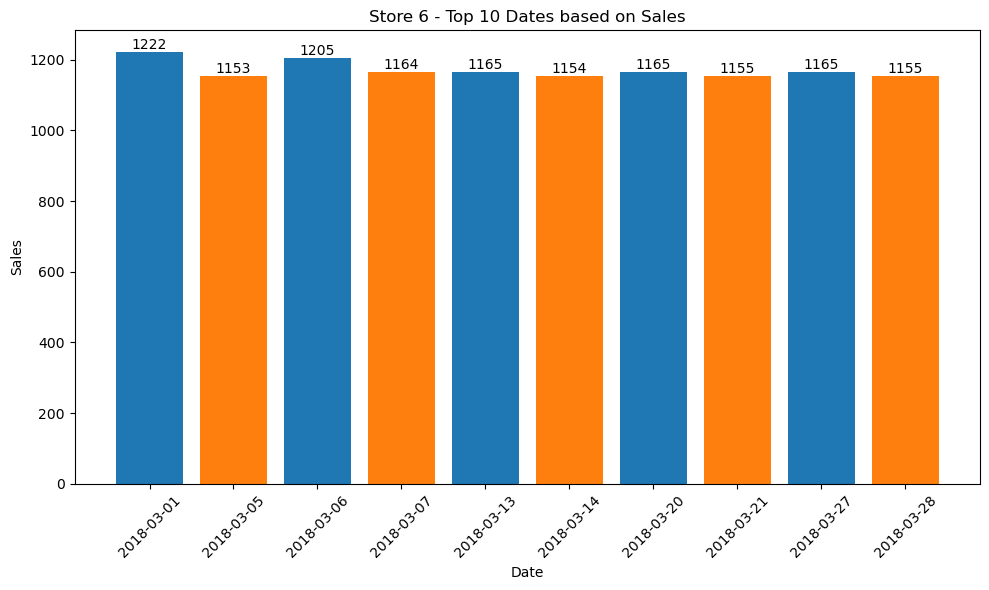

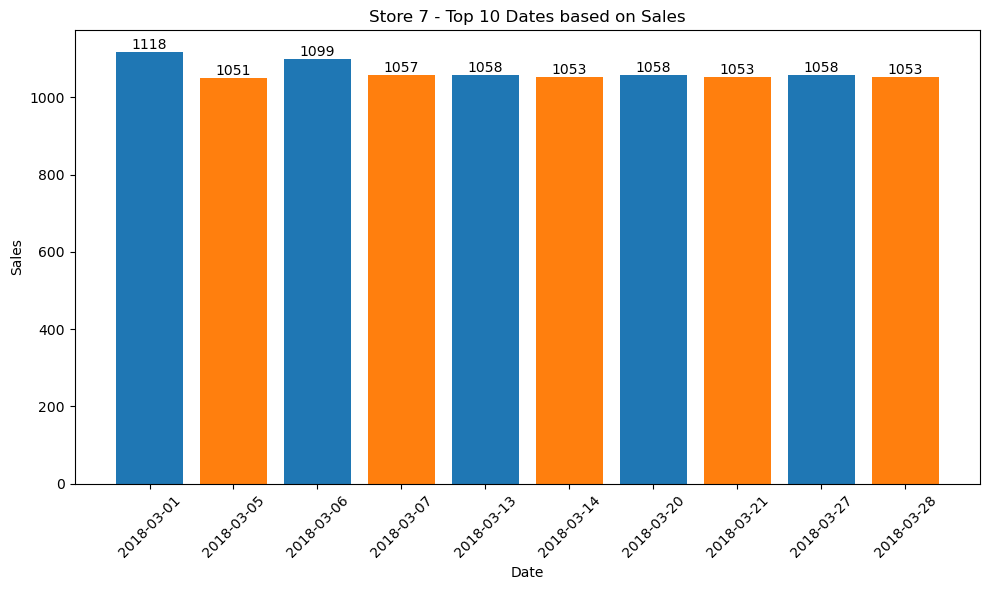

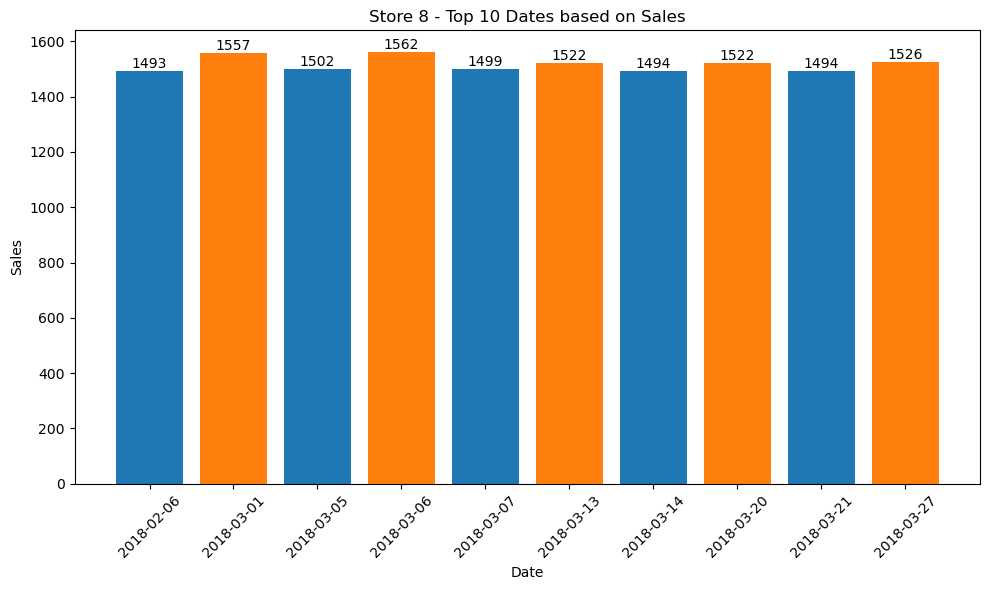

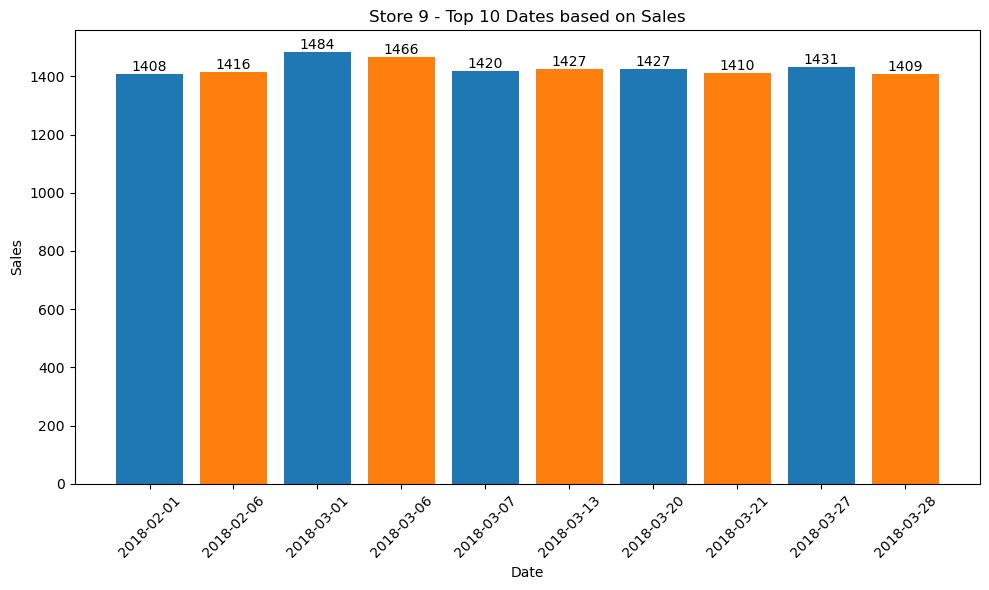

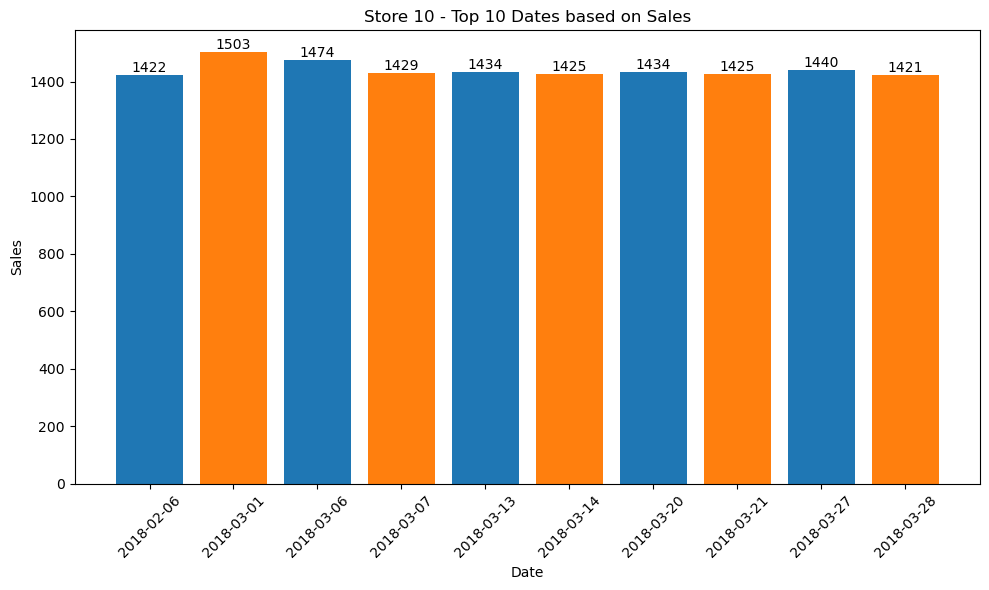

In [17]:
#merged_data = pd.read_csv('test_predictions_with_info.csv')

# Group by store and date and calculate total sales for each date within each store
total_sales_per_date = merged_data.groupby(['store', 'date'])['sales'].sum().reset_index()

# Sort the dates within each store based on total sales in descending order
total_sales_per_date['rank'] = total_sales_per_date.groupby('store')['sales'].rank(method='first', ascending=False)

# Select the top 10 dates for each store
top_10_dates_per_store = total_sales_per_date[total_sales_per_date['rank'] <= 10]

colors = ['#1f77b4', '#ff7f0e']


# Separate plot for each store

for i in range(1, 11):
    store_data = top_10_dates_per_store[top_10_dates_per_store['store'] == i]
    plt.figure(figsize=(10, 6))
    bars = plt.bar(store_data['date'], store_data['sales'], color=colors)
    plt.title(f'Store {i} - Top 10 Dates based on Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()

    for bar in bars:
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

    plt.show()


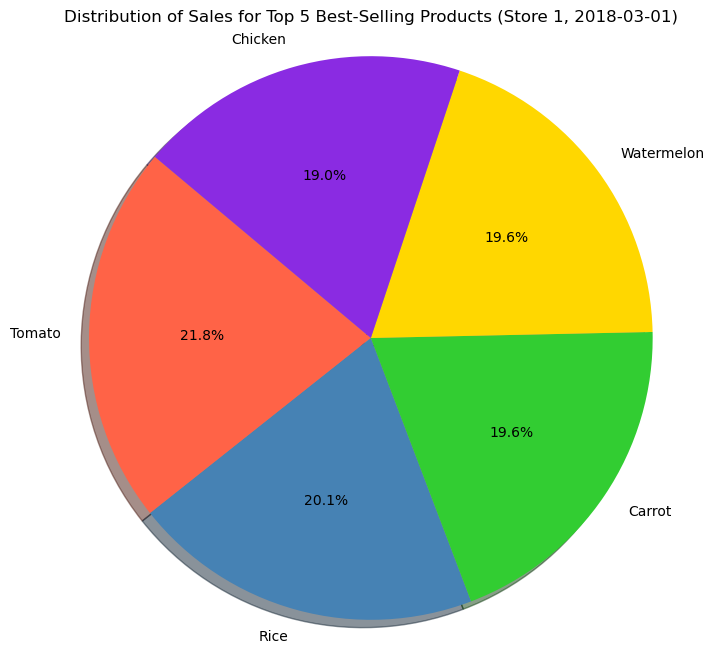

In [18]:
# Filter data for Store 1 on the date 2018-03-01
specific_date_data = merged_data[(merged_data['store'] == 1) & (merged_data['date'] == '2018-03-01')]

# Sort the data by sales in descending order (We need top 5 days)
specific_date_data = specific_date_data.sort_values(by='sales', ascending=False)

# Select the top 5 best-selling products
top_10_products = specific_date_data.head(5)

# Define colors for the pie chart
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_products['sales'], labels=top_10_products['product_name'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Distribution of Sales for Top 5 Best-Selling Products (Store 1, 2018-03-01)')
plt.axis('equal')
plt.show()


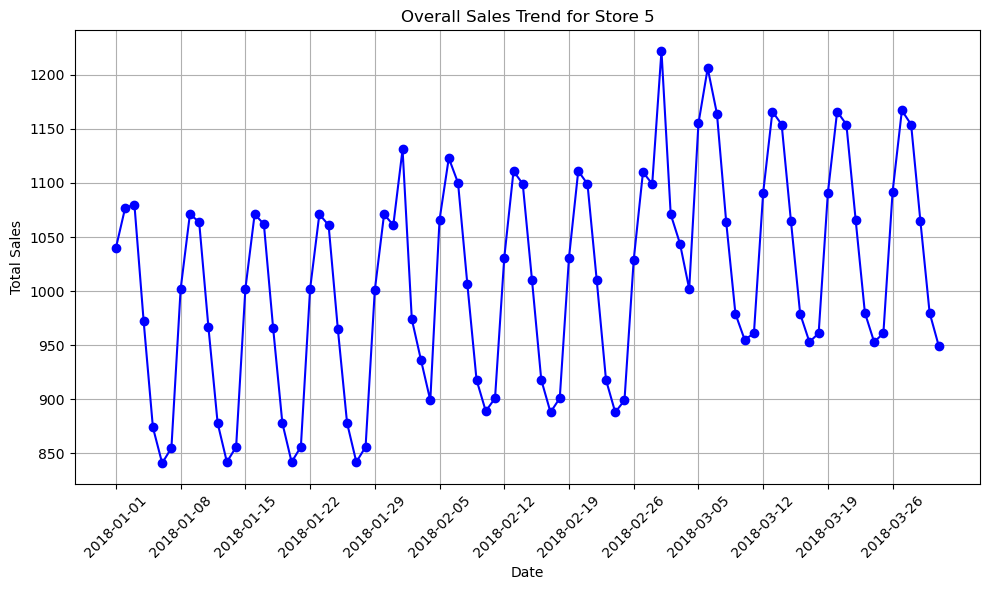

In [19]:
# Filter data for Store 5
store_5_data = merged_data[merged_data['store'] == 5]

# Group the data by date and calculate the total sales for each date
daily_sales_store_5 = store_5_data.groupby('date')['sales'].sum().reset_index()

# Plot line chart

plt.figure(figsize=(10, 6))
plt.plot(daily_sales_store_5['date'], daily_sales_store_5['sales'], marker='o', linestyle='-', color='b')
plt.title('Overall Sales Trend for Store 5')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(np.arange(0, len(daily_sales_store_5['date']), step=7), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_18648\4150691054.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_7_data['date'] = pd.to_datetime(store_7_data['date'])


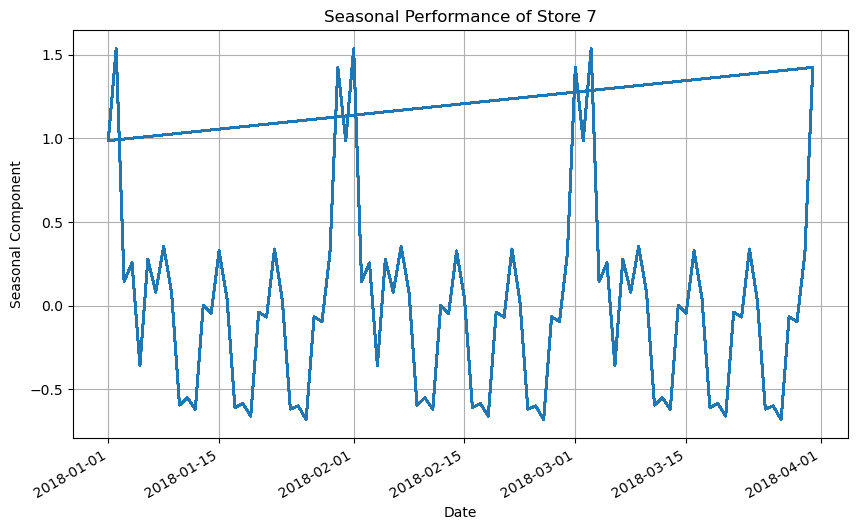

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Filter the data for Store 7
store_7_data = merged_data[merged_data['store'] == 7]

# Convert the date column to datetime format
store_7_data['date'] = pd.to_datetime(store_7_data['date'])

# Set the date column as the index
store_7_data.set_index('date', inplace=True)

# Perform seasonal decomposition (assuming monthly seasonality)
result = seasonal_decompose(store_7_data['sales'], model='additive', period=30)

# Plot seasonal component

plt.figure(figsize=(10, 6))
result.seasonal.plot()
plt.title('Seasonal Performance of Store 7')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.show()
